<a href="https://colab.research.google.com/github/Computer-CGuy/RoboKnightSubmission/blob/master/Gesture_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## You need to run the last cell first to load the data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # If you don't know this, this is the only recognizable ML Library in Python and used by professor and researchers 

## Organizing Data

In [ ]:
## Dataset to “module.identifier” notation

In [ ]:
class cameraData:
    pass

In [ ]:
cameraData.rightData1=rightData

In [ ]:
## But this is much better

In [ ]:
cameraData = {}

In [ ]:
cameraData["leftData"]=[leftData,leftData1,leftData2,leftData3,leftData4,leftData5]
cameraData["rightData"]=[rightData,rightData1,rightData2,rightData3,rightData4,rightData5]
cameraData["cwCircle"]=[cwCircle,cwCircle1,cwCircle2,cwCircle3,cwCircle4,cwCircle5]
cameraData["countCircle"]=[countCircle,countCircle1,countCircle2,countCircle3,countCircle4,countCircle5]

In [ ]:
np.array(cameraData["leftData"][0]).shape
#See much easier

(57, 2)

## Rough

In [ ]:
rd.shape

(46, 2)

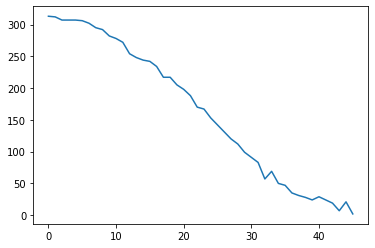

In [ ]:
rd = np.array(rightData)
plt.plot([x for x in range(rd.shape[0])],rd[:,0])
plt.show()


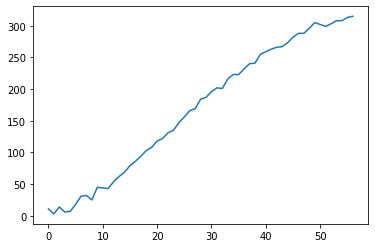

In [ ]:
ld = np.array(leftData)
plt.plot([x for x in range(ld.shape[0])],ld[:,0])
plt.show()

In [ ]:
mod = np.array([[x for x in range(ld.shape[0])],ld[:,0]])
mod = np.transpose(mod,(1,0))
mod.shape

(57, 2)

In [ ]:
mod[:10]

array([[11,  0],
       [ 3,  1],
       [14,  2],
       [ 6,  3],
       [ 7,  4],
       [18,  5],
       [31,  6],
       [32,  7],
       [25,  8],
       [45,  9]])

In [ ]:
classifier = LinearRegression()
classifier.fit(mod[:,:-1],mod[:,1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
classifier.score(mod[:,:-1],mod[:,1])

0.9868587110944718

In [ ]:
(classifier.coef_,classifier.intercept_)

(array([6.28610319]), -7.361766485178492)

In [ ]:
m = classifier.coef_
c = classifier.intercept_

In [ ]:
x = np.arange(0,50)
y = m*x + c

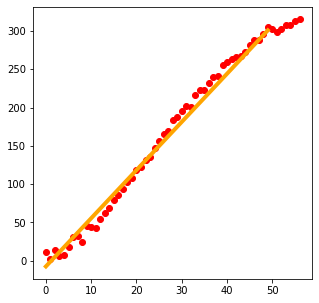

In [ ]:
_ = plt.figure(figsize=(5,5))
plt.scatter(mod[:,0],mod[:,1],color='red')
plt.plot(x,y,color='orange',linewidth=4)

## Function Implementation

In [ ]:
def getMandC(data,plot=False,diff=False,retScore = False):
    mod = np.array([[x for x in range(data.shape[0])],data[:,0]])
    mod = np.transpose(mod,(1,0))
    classifier = LinearRegression()
    classifier.fit(mod[:,:-1],mod[:,1])
    if(plot):
        c = classifier.intercept_
        m = classifier.coef_
        x = np.arange(0,data.shape[0])
        y = m*x + c
        if(not diff):
            _ = plt.figure(figsize=(10,10))
            plt.scatter(mod[:,0],mod[:,1],color='red')
            plt.plot(x,y,color='blue',linewidth=4)
        else:
            global ax
            ax.scatter(mod[:,0],mod[:,1],color='red')
            ax.plot(x,y,color='blue',linewidth=4)
    if(retScore):
        return (classifier.coef_,classifier.intercept_,classifier.score(mod[:,:-1],mod[:,1]))    
    return (classifier.coef_,classifier.intercept_)

In [ ]:
mod.shape

(57, 2)

(array([6.28610319]), -7.361766485178492)

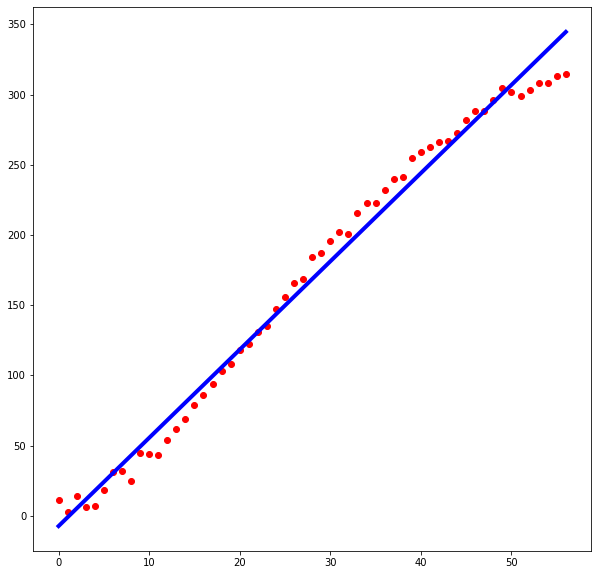

In [ ]:
getMandC(np.array(leftData),plot=True)

## Assignment

In [ ]:
txt = ""
ans = {}
for i,data in enumerate(cameraData["leftData"]):
    m,c = getMandC(np.array(data),plot=False)
    if(c<0):
        txt = "%.1fx - %0.1f"%(m,c)
    if(c>=0):
        txt = "%.1fx + %0.1f"%(m,c)
    ans["leftData"+str(i)]=txt
for i,data in enumerate(cameraData["rightData"]):
    m,c = getMandC(np.array(data),plot=False)
    if(c<0):
        txt = "%.1fx - %0.1f"%(m,c)
    if(c>=0):
        txt = "%.1fx + %0.1f"%(m,c)
    ans["rightData"+str(i)]=txt

In [ ]:
ans

{'leftData0': '6.3x - -7.4',
 'leftData1': '8.3x + 5.4',
 'leftData2': '12.6x - -1.5',
 'leftData3': '15.3x - -14.5',
 'leftData4': '16.3x - -47.1',
 'leftData5': '13.8x - -22.1',
 'rightData0': '-8.0x + 344.1',
 'rightData1': '-5.3x + 313.4',
 'rightData2': '-7.6x + 330.4',
 'rightData3': '-27.3x + 335.9',
 'rightData4': '-17.3x + 352.4',
 'rightData5': '-10.8x + 341.7'}

<Figure size 1008x1008 with 0 Axes>

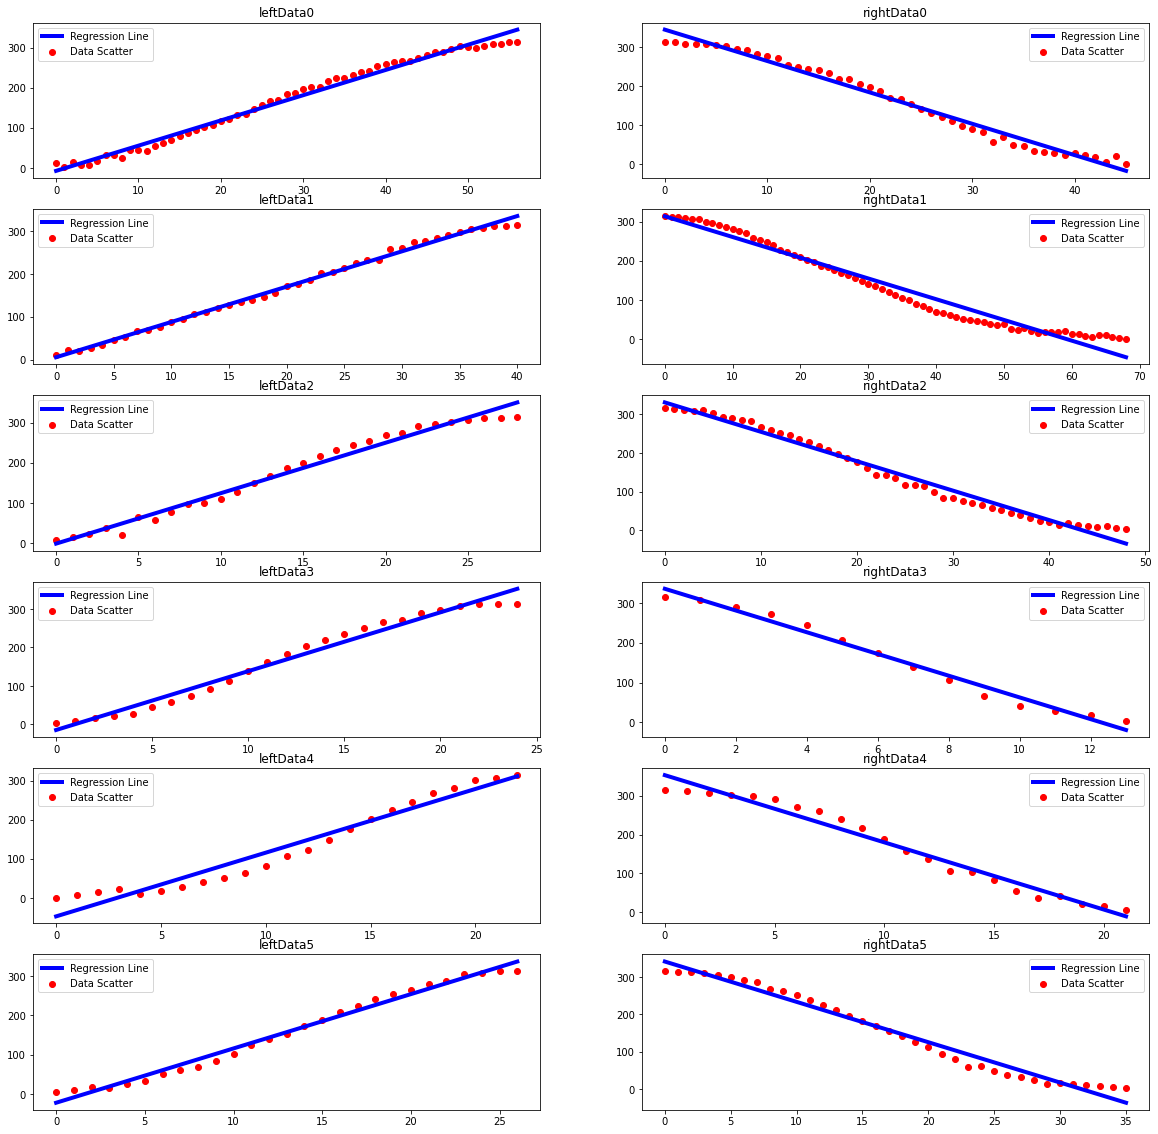

In [ ]:
_ = plt.figure(figsize=(14,14))
f,axs=plt.subplots(figsize=(20,20),nrows=6, ncols=2)
# _= f.figure()
metrics = []
vector = []
for i,data in enumerate(cameraData["leftData"]):
    ax =axs[i,0]
    m,c,score = getMandC(np.array(data),plot=True,diff=True,retScore=True)
    ax.set_title("leftData"+str(i))
    ax.legend(['Regression Line','Data Scatter'])
    vector.append(score)
metrics.append([vector])
vector = []
for i,data in enumerate(cameraData["rightData"]):
    ax =axs[i,1]
    m,c,score = getMandC(np.array(data),plot=True,diff=True,retScore=True)
    ax.set_title("rightData"+str(i))
    ax.legend(['Regression Line','Data Scatter'])
    vector.append(score)
metrics.append([vector])

In [ ]:
import pandas as pd

In [ ]:
np.array(metrics).shape

(2, 1, 6)

In [ ]:
# metrics = np.transpose(np.array(metrics0]),(1,0))
f = np.transpose(np.array(metrics)[:,0,:],(1,0))
df = pd.DataFrame(data=f,columns=["Left Data","Right Data"])
df

,Left Data,Right Data
0,0.986859,0.981800
1,0.995594,0.963278
2,0.980797,0.980309
3,0.976448,0.982068
4,0.951388,0.973598
5,0.985840,0.976272


In [ ]:
## This the linear regression line that I plotted, based on this 

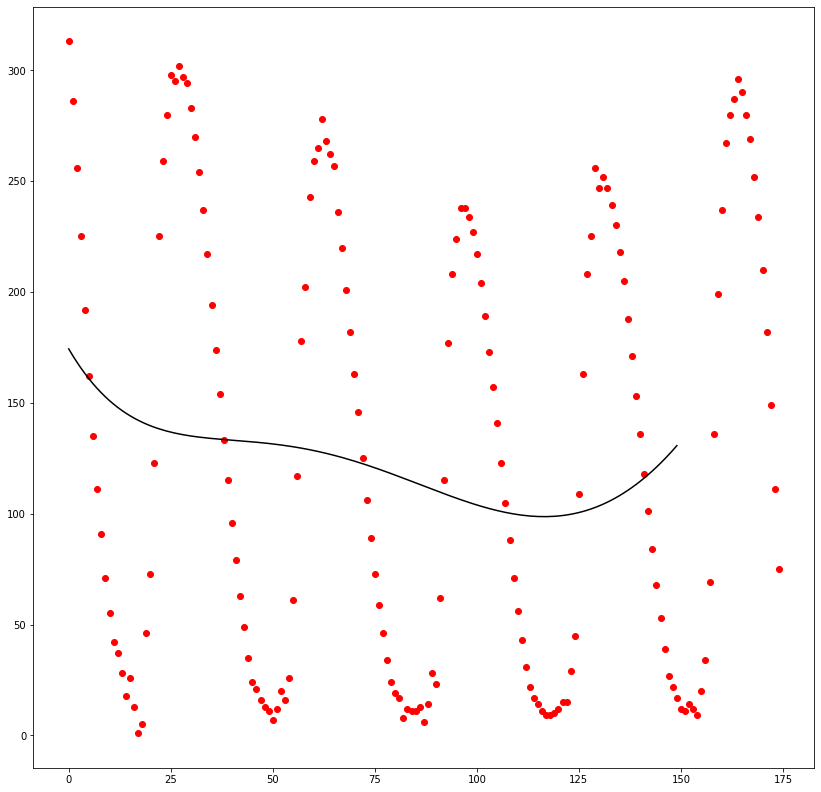

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 5
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())

_ = plt.figure(figsize=(14,14))
data = np.array(cameraData["countCircle"][0])
mod = np.array([[x for x in range(data.shape[0])],data[:,0]])
mod = np.transpose(mod,(1,0))
_ = plt.scatter(mod[:,0],mod[:,1],color='red')

polyreg.fit(mod[:,:-1],mod[:,1])

X_seq = [[x] for x in range(150)]
X_seq = np.array(X_seq)
plt.plot(X_seq,polyreg.predict(X_seq),color="black")

# getMandC(np.array(cameraData["countCircle"][0]),plot=True)

In [ ]:
def norm(v):
    v-=v.min()
    
    v = np.true_divide(v,v.max())
    return v

In [ ]:
(mod-mod.min()).max()

313

In [ ]:
mod = np.arcsin(norm(mod))

In [ ]:
mod-=1

array([[1.57079633, 0.        ],
       [1.29238702, 0.23277456],
       [1.23923611, 0.31092832],
       [1.2034526 , 0.37798926],
       [1.17567936, 0.44531204],
       [1.15265066, 0.50714857],
       [1.13280427, 0.56588908],
       [1.11526025, 0.6226893 ],
       [1.09946953, 0.67526121],
       [1.08506446, 0.73521992],
       [1.07178571, 0.79147418],
       [1.05944292, 0.84586456],
       [1.04789186, 0.86986054],
       [1.03702043, 0.9194717 ],
       [1.02673958, 0.99025882],
       [1.01697735, 0.93198462],
       [1.00767463, 1.03702043],
       [0.99878225, 1.29238702],
       [0.99025882, 1.15265066],
       [0.98206915, 0.82804344],
       [0.97418304, 0.7287861 ],
       [0.96657436, 0.59360117],
       [0.95922034, 0.37798926],
       [0.95210102, 0.30396921],
       [0.94519877, 0.25050478],
       [0.93849795, 0.19026354],
       [0.93198462, 0.20216823],
       [0.92564628, 0.17214879],
       [0.9194717 , 0.19436198],
       [0.91345072, 0.20590105],
       [0.

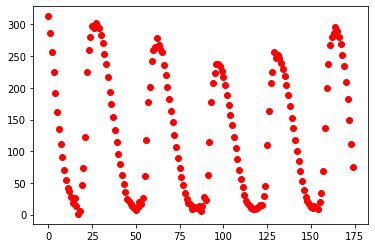

In [ ]:
# _ = plt.figure(figsize=(14,14))
# data = np.array(cameraData["countCircle"][0])
mod = np.array([[x for x in range (data.shape[0])],data[:,0]])
mod = np.transpose(mod,(1,0))
_ = plt.scatter(mod[:,0],mod[:,1],color='red')


In [ ]:
n

In [ ]:
np.arange()

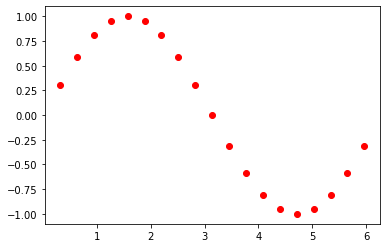

In [ ]:
x = np.arange(1,20,1)
x = np.true_divide(x,2  0)
x*=np.pi*2
y =np.sin(x)
_ = plt.scatter(x,y,color='red')

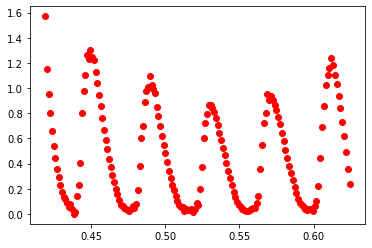

In [ ]:
a = norm(mod)
a-=0.6
a[:,1]*=np.pi
a = np.arcsin(norm(a))
_ = plt.scatter(a[:,0],a[:,1],color='red')

## Run this first

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 15 18:52:33 2019

@author: anmolsingh, rianborah

NOTE: The data was recorded for use in Python3. You will have to convert it accordingly for use in other languages

The document contains arrays of gestures captured by a camera.
There are 4 different type of gesture:
Moving Left - recorded in leftData
Moving Right - recorded in rightData
Clockwise Circle - recorded in cwCircle 
Counter-Clockwise Circle - recorded in countCircle

Gesture arrays followed by a number (e.g. leftData2, leftData3) indicate different recordings for the same type of gesture

"""

rightData = [[313, 51],
 [312, 60],
 [307, 74],
 [307, 69],
 [307, 97],
 [306, 101],
 [302, 104],
 [295, 94],
 [292, 105],
 [282, 95],
 [278, 95],
 [272, 108],
 [254, 96],
 [248, 96],
 [244, 80],
 [242, 102],
 [234, 104],
 [217, 74],
 [217, 132],
 [205, 116],
 [198, 106],
 [188, 95],
 [170, 119],
 [167, 120],
 [153, 86],
 [142, 83],
 [131, 79],
 [120, 82],
 [112, 79],
 [99, 75],
 [91, 77],
 [83, 77],
 [57, 110],
 [69, 74],
 [50, 79],
 [47, 69],
 [35, 67],
 [31, 67],
 [28, 68],
 [24, 52],
 [29, 44],
 [24, 45],
 [19, 39],
 [7, 52],
 [21, 21],
 [2, 30]]

leftData = [[11, 74],
 [3, 92],
 [14, 90],
 [6, 120],
 [7, 138],
 [18, 98],
 [31, 85],
 [32, 89],
 [25, 118],
 [45, 100],
 [44, 113],
 [43, 131],
 [54, 138],
 [62, 145],
 [69, 138],
 [79, 137],
 [86, 140],
 [94, 147],
 [103, 145],
 [108, 141],
 [118, 140],
 [122, 139],
 [131, 140],
 [135, 137],
 [147, 138],
 [156, 121],
 [166, 139],
 [169, 140],
 [184, 139],
 [187, 127],
 [196, 119],
 [202, 123],
 [201, 124],
 [216, 122],
 [223, 149],
 [223, 123],
 [232, 111],
 [240, 134],
 [241, 127],
 [255, 121],
 [259, 117],
 [263, 128],
 [266, 126],
 [267, 120],
 [273, 120],
 [282, 99],
 [288, 113],
 [288, 102],
 [296, 121],
 [305, 127],
 [302, 92],
 [299, 91],
 [303, 83],
 [308, 88],
 [308, 78],
 [313, 79],
 [315, 79]]



cwCircle = [[3, 104],
 [17, 114],
 [38, 101],
 [71, 115],
 [113, 148],
 [127, 139],
 [159, 126],
 [188, 125],
 [222, 133],
 [233, 117],
 [258, 115],
 [292, 124],
 [301, 104],
 [294, 63],
 [297, 60],
 [302, 37],
 [305, 24],
 [308, 9],
 [309, 3],
 [306, 10],
 [292, 43],
 [256, 96],
 [153, 121],
 [83, 92],
 [49, 68],
 [35, 79],
 [33, 82],
 [27, 97],
 [22, 117],
 [17, 145],
 [24, 160],
 [45, 117],
 [65, 139],
 [79, 138],
 [96, 138],
 [115, 150],
 [138, 155],
 [157, 140],
 [175, 141],
 [199, 166],
 [205, 144],
 [233, 167],
 [240, 138],
 [250, 142],
 [262, 142],
 [275, 141],
 [290, 164],
 [284, 149],
 [297, 137],
 [291, 136],
 [278, 130],
 [268, 117],
 [244, 114],
 [206, 89],
 [149, 99],
 [97, 124],
 [60, 99],
 [47, 101],
 [37, 104],
 [30, 108],
 [27, 111],
 [27, 114],
 [18, 141],
 [45, 123],
 [64, 170],
 [82, 131],
 [103, 131],
 [123, 154],
 [130, 133],
 [154, 142],
 [164, 144],
 [175, 135],
 [195, 143],
 [214, 166],
 [214, 151],
 [224, 152],
 [235, 153],
 [242, 154],
 [250, 169],
 [256, 153],
 [263, 151],
 [265, 149],
 [266, 146],
 [263, 135],
 [248, 125],
 [224, 129],
 [198, 134],
 [141, 150],
 [65, 152],
 [49, 109],
 [24, 141],
 [20, 119],
 [10, 152],
 [16, 106],
 [14, 110],
 [20, 133],
 [39, 113],
 [51, 158],
 [65, 159],
 [85, 166],
 [95, 117],
 [112, 161],
 [126, 144],
 [144, 151],
 [156, 159],
 [172, 146],
 [185, 150],
 [198, 152],
 [209, 154],
 [219, 155],
 [228, 170],
 [237, 157],
 [243, 157],
 [246, 156],
 [247, 174],
 [237, 153],
 [219, 160],
 [196, 154],
 [165, 174],
 [126, 147],
 [88, 159],
 [56, 132],
 [21, 148],
 [24, 139],
 [28, 133],
 [23, 145],
 [26, 132],
 [27, 130],
 [36, 168],
 [45, 141],
 [58, 143],
 [69, 144],
 [82, 143],
 [95, 154],
 [112, 167],
 [120, 133],
 [133, 127],
 [149, 177],
 [163, 153],
 [184, 143],
 [198, 156],
 [210, 158],
 [223, 160],
 [234, 161],
 [244, 162],
 [249, 164],
 [250, 165],
 [248, 166],
 [239, 166],
 [225, 166],
 [201, 165],
 [164, 155],
 [131, 162],
 [90, 174],
 [42, 172],
 [32, 152],
 [25, 141],
 [21, 141],
 [21, 143],
 [23, 143],
 [19, 161],
 [37, 144],
 [49, 141],
 [62, 145],
 [81, 146],
 [107, 145],
 [137, 151],
 [163, 152],
 [192, 153],
 [224, 156],
 [246, 156],
 [278, 159],
 [297, 161],
 [311, 159]]


countCircle = [[313, 120],
 [286, 106],
 [256, 126],
 [225, 121],
 [192, 119],
 [162, 115],
 [135, 119],
 [111, 117],
 [91, 115],
 [71, 111],
 [55, 104],
 [42, 98],
 [37, 92],
 [28, 64],
 [18, 48],
 [26, 20],
 [13, 9],
 [1, 68],
 [5, 113],
 [46, 75],
 [73, 71],
 [123, 83],
 [225, 111],
 [259, 96],
 [280, 138],
 [298, 139],
 [295, 135],
 [302, 147],
 [297, 138],
 [294, 144],
 [283, 133],
 [270, 137],
 [254, 141],
 [237, 138],
 [217, 143],
 [194, 165],
 [174, 145],
 [154, 149],
 [133, 145],
 [115, 144],
 [96, 144],
 [79, 140],
 [63, 140],
 [49, 137],
 [35, 134],
 [24, 130],
 [21, 110],
 [16, 96],
 [13, 65],
 [11, 47],
 [7, 41],
 [12, 23],
 [20, 19],
 [16, 74],
 [26, 88],
 [61, 68],
 [117, 74],
 [178, 86],
 [202, 58],
 [243, 99],
 [259, 102],
 [265, 147],
 [278, 164],
 [268, 129],
 [262, 136],
 [257, 162],
 [236, 145],
 [220, 145],
 [201, 168],
 [182, 150],
 [163, 150],
 [146, 150],
 [125, 149],
 [106, 149],
 [89, 148],
 [73, 147],
 [59, 146],
 [46, 144],
 [34, 142],
 [24, 136],
 [19, 126],
 [17, 121],
 [8, 127],
 [12, 85],
 [11, 78],
 [11, 66],
 [13, 61],
 [6, 111],
 [14, 130],
 [28, 90],
 [23, 151],
 [62, 138],
 [115, 141],
 [177, 102],
 [208, 106],
 [224, 113],
 [238, 118],
 [238, 127],
 [234, 132],
 [227, 138],
 [217, 143],
 [204, 138],
 [189, 149],
 [173, 150],
 [157, 150],
 [141, 150],
 [123, 149],
 [105, 148],
 [88, 146],
 [71, 139],
 [56, 139],
 [43, 136],
 [31, 134],
 [22, 132],
 [17, 117],
 [14, 106],
 [11, 82],
 [9, 68],
 [9, 59],
 [10, 50],
 [12, 49],
 [15, 48],
 [15, 114],
 [29, 129],
 [45, 123],
 [109, 63],
 [163, 99],
 [208, 105],
 [225, 106],
 [256, 166],
 [247, 122],
 [252, 131],
 [247, 137],
 [239, 143],
 [230, 147],
 [218, 150],
 [205, 153],
 [188, 154],
 [171, 155],
 [153, 155],
 [136, 155],
 [118, 153],
 [101, 152],
 [84, 149],
 [68, 146],
 [53, 143],
 [39, 140],
 [27, 148],
 [22, 115],
 [17, 106],
 [12, 73],
 [11, 59],
 [14, 49],
 [12, 42],
 [9, 44],
 [20, 93],
 [34, 99],
 [69, 99],
 [136, 109],
 [199, 99],
 [237, 99],
 [267, 99],
 [280, 106],
 [287, 109],
 [296, 116],
 [290, 123],
 [280, 118],
 [269, 127],
 [252, 126],
 [234, 122],
 [210, 124],
 [182, 110],
 [149, 128],
 [111, 132],
 [75, 117]]

rightData1 = [[314, 100],
       [312,  99],
       [311, 109],
       [309, 119],
       [306, 124],
       [306, 144],
       [299, 135],
       [297, 154],
       [292, 148],
       [287, 149],
       [280, 143],
       [276, 148],
       [272, 160],
       [258, 150],
       [252, 124],
       [249, 151],
       [240, 145],
       [227, 129],
       [222, 144],
       [215, 144],
       [209, 144],
       [202, 144],
       [196, 143],
       [188, 144],
       [183, 143],
       [177, 144],
       [168, 144],
       [163, 144],
       [155, 144],
       [149, 144],
       [141, 145],
       [135, 145],
       [128, 144],
       [120, 144],
       [113, 145],
       [106, 145],
       [ 99, 145],
       [ 91, 145],
       [ 85, 145],
       [ 78, 146],
       [ 70, 146],
       [ 66, 146],
       [ 61, 146],
       [ 57, 144],
       [ 53, 144],
       [ 49, 142],
       [ 46, 144],
       [ 43, 138],
       [ 40, 142],
       [ 36, 141],
       [ 39, 138],
       [ 26, 139],
       [ 25, 147],
       [ 29, 142],
       [ 21, 150],
       [ 16, 132],
       [ 19, 145],
       [ 20, 139],
       [ 20, 139],
       [ 22, 133],
       [ 13, 139],
       [ 14, 131],
       [  9, 138],
       [  6, 126],
       [ 11, 122],
       [ 11, 119],
       [  7, 114],
       [  3, 107],
       [  2, 107]]

rightData2 = [[315, 102],
       [313,  89],
       [311, 101],
       [309, 133],
       [310, 159],
       [303, 140],
       [292, 125],
       [291, 141],
       [284, 140],
       [282, 139],
       [267, 158],
       [260, 139],
       [252, 139],
       [245, 139],
       [237, 139],
       [227, 139],
       [218, 140],
       [207, 140],
       [198, 140],
       [187, 141],
       [177, 136],
       [162, 141],
       [144, 137],
       [143, 143],
       [134, 143],
       [118, 156],
       [116, 144],
       [114, 144],
       [ 99, 144],
       [ 84, 145],
       [ 84, 145],
       [ 77, 145],
       [ 71, 146],
       [ 65, 140],
       [ 58, 146],
       [ 53, 147],
       [ 45, 148],
       [ 39, 149],
       [ 32, 149],
       [ 23, 148],
       [ 22, 149],
       [ 13, 170],
       [ 20, 134],
       [ 15, 133],
       [ 12, 131],
       [  9, 119],
       [ 10, 108],
       [  5, 105],
       [  3, 104]]

rightData3 = [[315,  90],
       [308, 139],
       [290, 134],
       [272, 117],
       [246, 138],
       [207, 143],
       [175, 142],
       [139, 142],
       [107, 127],
       [ 67, 125],
       [ 42, 119],
       [ 28,  93],
       [ 19,  59],
       [  4,  40]]

rightData4 = [[315,  48],
       [313,  60],
       [306,  60],
       [301,  64],
       [299,  98],
       [290, 101],
       [271,  84],
       [260,  95],
       [239,  88],
       [216, 106],
       [189, 126],
       [159, 106],
       [138, 120],
       [106, 124],
       [104,  94],
       [ 83,  88],
       [ 55,  89],
       [ 37,  98],
       [ 43,  62],
       [ 21,  62],
       [ 16,  18],
       [  5,  20]]

rightData5 = [[316,  79],
       [315,  88],
       [313, 102],
       [311, 135],
       [305, 129],
       [300, 121],
       [291, 160],
       [286, 141],
       [269, 105],
       [263, 133],
       [251, 134],
       [239, 134],
       [224, 134],
       [211, 134],
       [196, 133],
       [183, 133],
       [169, 133],
       [156, 133],
       [141, 133],
       [126, 133],
       [112, 133],
       [ 95, 132],
       [ 80, 132],
       [ 59, 156],
       [ 61, 132],
       [ 47, 145],
       [ 38, 130],
       [ 33, 124],
       [ 25, 128],
       [ 14, 135],
       [ 17, 115],
       [ 14, 103],
       [ 11,  95],
       [  7,  84],
       [  5,  80],
       [  2,  76]]

leftData1 = [[ 11,  86],
       [ 22,  87],
       [ 20, 126],
       [ 26, 144],
       [ 34, 139],
       [ 45, 149],
       [ 52, 149],
       [ 66, 127],
       [ 68, 129],
       [ 76, 138],
       [ 88, 139],
       [ 95, 140],
       [106, 148],
       [111, 162],
       [120, 134],
       [127, 145],
       [134, 145],
       [140, 146],
       [147, 144],
       [156, 143],
       [171, 148],
       [176, 145],
       [187, 154],
       [202, 159],
       [204, 145],
       [215, 158],
       [225, 149],
       [233, 153],
       [233, 144],
       [258, 172],
       [260, 114],
       [275, 157],
       [277, 146],
       [285, 151],
       [290, 146],
       [298, 150],
       [306, 170],
       [308, 155],
       [313, 133],
       [313, 130],
       [314, 109]]

leftData2 = [[  7,  57],
       [ 15,  56],
       [ 22,  55],
       [ 37,  58],
       [ 21, 104],
       [ 64,  62],
       [ 58,  93],
       [ 77,  78],
       [ 98,  82],
       [101, 105],
       [111, 104],
       [128,  96],
       [150, 102],
       [167, 102],
       [187, 108],
       [199, 129],
       [216, 116],
       [232, 113],
       [245, 116],
       [255, 100],
       [269, 114],
       [274,  86],
       [291, 126],
       [296, 117],
       [301, 128],
       [307, 111],
       [311, 107],
       [313,  96],
       [314,  85]]

leftData3 = [[  4,  85],
       [ 10,  98],
       [ 16, 112],
       [ 22, 135],
       [ 28, 128],
       [ 44, 142],
       [ 57, 139],
       [ 75, 139],
       [ 92, 138],
       [114, 141],
       [140, 140],
       [162, 146],
       [182, 136],
       [203, 135],
       [220, 134],
       [235, 134],
       [252, 134],
       [267, 156],
       [271, 112],
       [291, 127],
       [298, 135],
       [308, 152],
       [312, 146],
       [312, 106],
       [312,  81]]

leftData4 = [[  1,  68],
       [  7,  68],
       [ 15,  66],
       [ 24,  70],
       [ 10, 106],
       [ 17, 114],
       [ 27, 118],
       [ 41, 110],
       [ 50, 115],
       [ 65, 125],
       [ 81, 114],
       [107, 107],
       [123, 107],
       [148, 132],
       [177, 126],
       [201, 125],
       [226, 134],
       [246, 126],
       [268, 131],
       [282, 120],
       [301, 131],
       [307, 101],
       [314,  87]]

leftData5 = [[  4,  67],
       [ 11,  68],
       [ 18,  65],
       [ 15,  88],
       [ 25,  93],
       [ 34,  97],
       [ 50,  95],
       [ 61,  98],
       [ 68, 120],
       [ 85, 136],
       [102, 123],
       [124, 123],
       [140, 125],
       [154, 125],
       [172, 125],
       [189, 124],
       [209, 123],
       [225, 122],
       [241, 123],
       [254, 121],
       [266, 119],
       [281, 103],
       [288, 108],
       [305, 115],
       [307,  99],
       [312,  85],
       [314,  70]]

cwCircle1 = [[ 14, 107],
       [ 39,  79],
       [ 56, 177],
       [ 70, 129],
       [ 89, 116],
       [121, 156],
       [144, 135],
       [169, 145],
       [183, 130],
       [202, 119],
       [227, 131],
       [247, 139],
       [247,  93],
       [284, 153],
       [282, 140],
       [274,  90],
       [283, 132],
       [281, 130],
       [241, 145],
       [194, 142],
       [135, 117],
       [115,  99],
       [ 75,  99],
       [ 50, 103],
       [ 26, 142],
       [ 32,  75],
       [ 13, 148],
       [ 16, 143],
       [ 13, 134],
       [ 24, 137],
       [ 47, 119],
       [ 54, 124],
       [ 68, 123],
       [ 89, 109],
       [101, 125],
       [113, 153],
       [128, 127],
       [142, 129],
       [156, 132],
       [170, 134],
       [185, 138],
       [204, 158],
       [216, 144],
       [229, 135],
       [244, 151],
       [264, 163],
       [274, 159],
       [276, 138],
       [276, 120],
       [292, 147],
       [290, 157],
       [286, 104],
       [298, 148],
       [270, 107],
       [250, 131],
       [211,  99],
       [175,  99],
       [ 90, 143],
       [ 55, 133],
       [ 65,  99],
       [ 52, 102],
       [ 46,  99],
       [ 38, 107],
       [ 41, 107],
       [ 48, 110],
       [ 51, 116],
       [ 63, 119],
       [ 77, 119],
       [ 91, 121],
       [104, 126],
       [120, 123],
       [131, 145],
       [145, 101],
       [159, 152],
       [174, 150],
       [186, 151],
       [198, 142],
       [214, 154],
       [224, 137],
       [234, 144],
       [248, 152],
       [251, 143],
       [259, 124],
       [272, 140],
       [278, 140],
       [284, 150],
       [287, 130],
       [286, 125],
       [283,  99],
       [282, 114],
       [258, 116],
       [210, 143],
       [153, 125],
       [119,  99],
       [ 84,  99],
       [ 61,  99],
       [ 47,  68],
       [ 21,  78],
       [ 16,  72],
       [ 25,  29],
       [ 18,  65],
       [ 23,  66],
       [ 18,  78],
       [ 27,  98],
       [ 28, 118],
       [ 55,  86],
       [ 60, 101],
       [ 61, 130],
       [ 85, 107],
       [ 99, 123],
       [113, 112],
       [140,  91],
       [167, 103],
       [198, 104],
       [222,  93],
       [277, 101],
       [301, 102],
       [310,  85]]

cwCircle2 = [[  9,  64],
       [ 23, 107],
       [ 44,  93],
       [ 68, 108],
       [ 92, 125],
       [111,  86],
       [139, 107],
       [163, 122],
       [190, 124],
       [217, 123],
       [234, 112],
       [246, 108],
       [278, 122],
       [288, 101],
       [298,  85],
       [301,  47],
       [299,  36],
       [300,  23],
       [300,  20],
       [299,  19],
       [297,  40],
       [296,  63],
       [279,  99],
       [251, 107],
       [207, 104],
       [169, 100],
       [ 98, 142],
       [ 73, 102],
       [ 60, 156],
       [ 72,  70],
       [ 54, 109],
       [ 46, 144],
       [ 55, 116],
       [ 61, 113],
       [ 67, 113],
       [ 81, 113],
       [ 83, 113],
       [ 94, 127],
       [111, 112],
       [118, 113],
       [134, 105],
       [146, 105],
       [158, 105],
       [172, 104],
       [188, 106],
       [199, 103],
       [205, 105],
       [222, 112],
       [229,  91],
       [245, 112],
       [269, 117],
       [275, 108],
       [280, 123],
       [282, 121],
       [288, 126],
       [289, 148],
       [294, 141],
       [301, 128],
       [276,  75],
       [289, 154],
       [286, 122],
       [238, 142],
       [182,  95],
       [139,  99],
       [102,  99],
       [ 70,  99],
       [ 56,  65],
       [ 48,  76],
       [ 42,  99],
       [ 38,  97],
       [ 38, 106],
       [ 46,  83],
       [ 52,  79],
       [ 57, 107],
       [ 66, 107],
       [ 76, 125],
       [ 88, 106],
       [103, 114],
       [119, 131],
       [136,  87],
       [149, 113],
       [168, 136],
       [176,  96],
       [193, 100],
       [211, 104],
       [224, 112],
       [239, 107],
       [253, 106],
       [267, 119],
       [279, 109],
       [290, 107],
       [308, 148],
       [309, 132],
       [308, 120],
       [310, 112],
       [308,  90],
       [304,  76],
       [309,  98],
       [300,  78],
       [304, 133],
       [294, 162],
       [283, 147],
       [244, 150],
       [182, 161],
       [132, 128],
       [ 61, 130],
       [ 62,  99],
       [ 52, 102],
       [ 43, 100],
       [ 37,  95],
       [ 35,  94],
       [ 35,  88],
       [ 36,  99],
       [ 41, 100],
       [ 48, 101],
       [ 61, 102],
       [ 71, 102],
       [ 86,  88],
       [ 95, 127],
       [113, 130],
       [128, 132],
       [152, 121],
       [171, 114],
       [191, 118],
       [210, 117],
       [225,  95],
       [249, 128],
       [266, 106],
       [284, 115],
       [306, 131],
       [311,  83]]

cwCircle3 = [[  2,  25],
       [ 13,  27],
       [ 63,  41],
       [ 77,  39],
       [ 83,  90],
       [105, 116],
       [124,  72],
       [143,  87],
       [157,  73],
       [186, 113],
       [195,  80],
       [206,  67],
       [240,  97],
       [254,  90],
       [265,  85],
       [280,  81],
       [293,  75],
       [292,  53],
       [295,  40],
       [292,  27],
       [295,  26],
       [291,  33],
       [291,  45],
       [281,  52],
       [275,  97],
       [251, 136],
       [195,  81],
       [100,  87],
       [ 63,  83],
       [ 50,  53],
       [ 54,  25],
       [ 23,  80],
       [ 33,  31],
       [ 28,  69],
       [ 57,  58],
       [ 68,  53],
       [ 68,  75],
       [ 93,  25],
       [ 90,  72],
       [102,  73],
       [119,  75],
       [123, 104],
       [136, 102],
       [142,  95],
       [154, 107],
       [166,  92],
       [179, 116],
       [191, 124],
       [200, 115],
       [212, 114],
       [226, 120],
       [240, 135],
       [249, 137],
       [260, 134],
       [267, 123],
       [282, 126],
       [302, 149],
       [297, 125],
       [301, 135],
       [299, 108],
       [300,  99],
       [300,  84],
       [299,  83],
       [301,  92],
       [298,  86],
       [282,  55],
       [272,  53],
       [241, 130],
       [213, 120],
       [140, 115],
       [103,  99],
       [ 65,  99],
       [ 55,  99],
       [ 25, 115],
       [ 18, 129],
       [ 25,  63],
       [ 30,  97],
       [ 40, 107],
       [ 60,  83],
       [ 68,  75],
       [ 70,  99],
       [ 86,  90],
       [ 96, 107],
       [105, 116],
       [125, 113],
       [137, 158],
       [151, 106],
       [166, 109],
       [178,  82],
       [194,  98],
       [213, 134],
       [229, 131],
       [241, 122],
       [258, 139],
       [264, 132],
       [273, 127],
       [282, 127],
       [293, 139],
       [300, 129],
       [310, 142],
       [303,  97],
       [307,  88],
       [308,  79],
       [309,  84],
       [306,  79],
       [303, 101],
       [293,  91],
       [283,  86],
       [274,  85],
       [230,  29],
       [195, 104],
       [122, 108],
       [ 62, 119],
       [ 68,  99],
       [ 55,  95],
       [ 46,  68],
       [ 41,  52],
       [ 29,  43],
       [ 24,  51],
       [ 36,  48],
       [ 35,  56],
       [ 37,  70],
       [ 38, 102],
       [ 57,  93],
       [ 81,  83],
       [ 95,  86],
       [107, 108],
       [127, 102],
       [148, 103],
       [174,  66],
       [191, 110],
       [212, 112],
       [228, 112],
       [243,  86],
       [266, 119],
       [286, 126],
       [294, 105],
       [305, 100],
       [314,  86]]

cwCircle4 = [[  8,  16],
       [ 24,  19],
       [ 36,  51],
       [ 59,  43],
       [ 83,  66],
       [107,  40],
       [135,  52],
       [169,  74],
       [196,  74],
       [218,  71],
       [239,  74],
       [263,  83],
       [259,  59],
       [297,  84],
       [286,  53],
       [299,  46],
       [307,  42],
       [304,  28],
       [308,  13],
       [310,  17],
       [309,   9],
       [306,  10],
       [302,  13],
       [304,  17],
       [296,  30],
       [296,  66],
       [280,  42],
       [253,  49],
       [217,  74],
       [171,  74],
       [141,  89],
       [111, 131],
       [ 75, 115],
       [ 75, 105],
       [ 89, 103],
       [ 92, 109],
       [ 96, 113],
       [108, 116],
       [112, 119],
       [119, 121],
       [128, 123],
       [140, 123],
       [150, 123],
       [160, 126],
       [176, 143],
       [185, 141],
       [199, 142],
       [212, 141],
       [224, 140],
       [241, 155],
       [249, 116],
       [260, 142],
       [274, 116],
       [285, 132],
       [294, 135],
       [296, 127],
       [293, 107],
       [307,  96],
       [306,  78],
       [302,  74],
       [303,  66],
       [305,  57],
       [302,  69],
       [291,  56],
       [288,  72],
       [277,  75],
       [241, 114],
       [207,  92],
       [150,  98],
       [131,  99],
       [107,  99],
       [100,  99],
       [ 88, 106],
       [ 83, 113],
       [ 83, 113],
       [ 89, 117],
       [ 93, 115],
       [105, 116],
       [115, 116],
       [125, 115],
       [135, 116],
       [148, 135],
       [161, 130],
       [173, 113],
       [186,  99],
       [201, 133],
       [207,  91],
       [228, 136],
       [236, 125],
       [248, 120],
       [262, 137],
       [275, 138],
       [272, 128],
       [287, 150],
       [295, 134],
       [297, 126],
       [299, 142],
       [304, 145],
       [301, 156],
       [301, 145],
       [298, 149],
       [282, 119],
       [273, 114],
       [239, 144],
       [218, 104],
       [173,  99],
       [132,  99],
       [ 92,  99],
       [ 72,  99],
       [ 56,  99],
       [ 48,  99],
       [ 29, 139],
       [ 37,  78],
       [ 35,  87],
       [ 34,  59],
       [ 27, 100],
       [ 22, 125],
       [ 41, 104],
       [ 45, 130],
       [ 55, 128],
       [ 80,  95],
       [ 87, 139],
       [104, 126],
       [122, 117],
       [139, 103],
       [152, 120],
       [171, 109],
       [193, 105],
       [210, 110],
       [235, 138],
       [250, 123],
       [268, 117],
       [285, 115],
       [298, 103],
       [309,  86]]

cwCircle5 = [[  7,  18],
       [ 16,  36],
       [ 29,  47],
       [ 55,  30],
       [ 70,  34],
       [ 86,  73],
       [107,  57],
       [125,  73],
       [149,  89],
       [167,  70],
       [191,  98],
       [211,  91],
       [225,  76],
       [241,  91],
       [250,  77],
       [274,  84],
       [276,  79],
       [300,  96],
       [299,  77],
       [289,  59],
       [284,  41],
       [292,  52],
       [300,  54],
       [300,  55],
       [288,  36],
       [281,  27],
       [292,  58],
       [278, 101],
       [242,  98],
       [205,  83],
       [132,  88],
       [ 73,  95],
       [ 64,  72],
       [ 54,  47],
       [ 63,  58],
       [ 41, 113],
       [ 50,  98],
       [ 47, 122],
       [ 65, 108],
       [ 67, 103],
       [ 75, 114],
       [ 81, 127],
       [ 88, 138],
       [ 94, 124],
       [107,  96],
       [114, 102],
       [132, 120],
       [150, 118],
       [164, 118],
       [176, 120],
       [190, 114],
       [207, 120],
       [222, 120],
       [237, 129],
       [249, 121],
       [253, 123],
       [275, 131],
       [286, 140],
       [289, 112],
       [303, 143],
       [310, 134],
       [302, 110],
       [305,  97],
       [307,  86],
       [307,  74],
       [308,  81],
       [305,  79],
       [303,  89],
       [305, 107],
       [291,  89],
       [267, 101],
       [237, 112],
       [205, 123],
       [138,  86],
       [119, 114],
       [ 74, 104],
       [ 72, 100],
       [ 54, 102],
       [ 47, 120],
       [ 45, 108],
       [ 41, 111],
       [ 45, 112],
       [ 53, 129],
       [ 60, 120],
       [ 80, 113],
       [ 79, 120],
       [ 82, 129],
       [ 99,  89],
       [118,  88],
       [136, 122],
       [147, 114],
       [163, 170],
       [170,  86],
       [189, 101],
       [207, 125],
       [229, 134],
       [235, 114],
       [248, 141],
       [249, 102],
       [258, 111],
       [279, 139],
       [289, 149],
       [292, 141],
       [305, 125],
       [293, 135],
       [302, 114],
       [310, 149],
       [308, 153],
       [304, 136],
       [299, 128],
       [291, 129],
       [279, 161],
       [251, 139],
       [212, 150],
       [183, 117],
       [122, 128],
       [ 96, 103],
       [ 43, 130],
       [ 35, 112],
       [ 50,  66],
       [ 27,  45],
       [ 36,  42],
       [ 31,  44],
       [ 32,  49],
       [ 38,  51],
       [ 22, 111],
       [ 30, 113],
       [ 41, 118],
       [ 54, 117],
       [ 71, 116],
       [ 83, 118],
       [103, 126],
       [124, 108],
       [138, 119],
       [161, 127],
       [180, 126],
       [197, 121],
       [221, 146],
       [237, 122],
       [263, 150],
       [273, 109],
       [291, 117],
       [307, 114],
       [312,  91]]

countCircle1 = [[316,  72],
       [296,  89],
       [270,  97],
       [203,  58],
       [169,  68],
       [120,  87],
       [ 93,  83],
       [ 74,  49],
       [ 38,  78],
       [ 35,  28],
       [  8,  23],
       [  8,  16],
       [ 19,  25],
       [269,  13],
       [287,  34],
       [302,  45],
       [301,  37],
       [305,  30],
       [306,  37],
       [305,  73],
       [301,  99],
       [288, 103],
       [271, 112],
       [254,  98],
       [235,  91],
       [218, 109],
       [196, 137],
       [181, 109],
       [158, 113],
       [139, 127],
       [120, 121],
       [104, 104],
       [ 83, 117],
       [ 63, 114],
       [ 51, 111],
       [ 39, 104],
       [ 31,  84],
       [ 14, 103],
       [ 11,  81],
       [ 25,  21],
       [  7,  18],
       [  3,   4],
       [ 14,  16],
       [ 22,  12],
       [139,  94],
       [230,  97],
       [280,  82],
       [290,  83],
       [289,  86],
       [294, 100],
       [292, 114],
       [285, 108],
       [272, 107],
       [269, 149],
       [253, 128],
       [242, 141],
       [226, 149],
       [212, 138],
       [195, 146],
       [178, 144],
       [160, 144],
       [141, 144],
       [127, 126],
       [111, 126],
       [ 94, 124],
       [ 80, 120],
       [ 67, 119],
       [ 56, 115],
       [ 46, 110],
       [ 36, 107],
       [ 32, 108],
       [ 28,  62],
       [ 25,  54],
       [ 43,   9],
       [ 32,  73],
       [ 92, 117],
       [172, 101],
       [248, 105],
       [277,  76],
       [285,  76],
       [295,  86],
       [304, 123],
       [299,  97],
       [300, 112],
       [293, 117],
       [280, 105],
       [268, 150],
       [249, 153],
       [230, 135],
       [208, 134],
       [186, 109],
       [158, 111]]

countCircle2 = [[310, 123],
       [286, 114],
       [263, 124],
       [238, 143],
       [212, 105],
       [186, 121],
       [162, 124],
       [136, 142],
       [119, 129],
       [105, 114],
       [ 89, 110],
       [ 80, 101],
       [ 53, 114],
       [ 63,  71],
       [ 40, 101],
       [ 28,  96],
       [ 53,  40],
       [ 62,  21],
       [ 46, 103],
       [116, 101],
       [210,  85],
       [278,  59],
       [284,  41],
       [296,  19],
       [308,   8],
       [310,  25],
       [312,   8],
       [311,  69],
       [306,  95],
       [303, 143],
       [288, 144],
       [269, 143],
       [255, 156],
       [234, 131],
       [217, 122],
       [200, 124],
       [178, 142],
       [160, 138],
       [138, 149],
       [120, 130],
       [103, 124],
       [ 87, 123],
       [ 74, 118],
       [ 61, 115],
       [ 49,  98],
       [ 43,  91],
       [ 24, 119],
       [ 14, 119],
       [ 36,  66],
       [ 37,  36],
       [ 19,  59],
       [ 25,  47],
       [ 31,  50],
       [ 49,  72],
       [ 51,  83],
       [125,  93],
       [204,  80],
       [272,  75],
       [287,  60],
       [298,  41],
       [303,  46],
       [307,  82],
       [307,  70],
       [307,  93],
       [304, 100],
       [302, 127],
       [286, 123],
       [279, 128],
       [261, 149],
       [241, 125],
       [225, 142],
       [205, 142],
       [184, 148],
       [162, 137],
       [140, 143],
       [125, 110],
       [ 93, 138],
       [ 81, 117],
       [ 63, 120],
       [ 48, 112],
       [ 45,  85],
       [ 24, 105],
       [ 10, 106],
       [ 18,  62],
       [ 15,  54],
       [ 26,  19],
       [ 29,  15],
       [ 31,   7],
       [ 46,   1],
       [ 11,  20],
       [ 37, 113],
       [ 54,  85],
       [123, 105],
       [168,  88],
       [212,  73],
       [262,  74],
       [280,  50],
       [295,  71],
       [302,  59],
       [306,  71],
       [309,  72],
       [308,  75],
       [309,  76],
       [307, 100],
       [300, 102],
       [291, 108],
       [280, 119],
       [267, 133],
       [244, 110],
       [226, 117],
       [203, 121],
       [180,  91],
       [150, 121],
       [122, 115],
       [ 88, 127],
       [ 59, 115],
       [ 10, 104],
       [  3,  76]]

countCircle3 = [[313,  84],
       [292,  95],
       [268, 100],
       [240,  93],
       [210,  96],
       [184,  84],
       [158,  87],
       [125,  95],
       [102, 103],
       [ 80, 109],
       [ 65,  95],
       [ 94,  73],
       [ 53,  99],
       [ 59,  96],
       [ 78,  65],
       [137,  70],
       [245,  58],
       [268,  62],
       [283,  25],
       [295,   7],
       [304,   5],
       [305,   7],
       [307,  12],
       [310,  19],
       [308,  46],
       [302,  78],
       [306, 125],
       [290, 130],
       [274, 128],
       [257, 112],
       [238, 126],
       [223, 139],
       [203, 128],
       [186, 121],
       [162, 128],
       [146, 123],
       [124, 116],
       [107, 115],
       [ 87, 117],
       [ 73, 108],
       [ 62, 104],
       [ 52,  94],
       [ 36,  91],
       [ 30,  87],
       [ 39,  29],
       [ 42,  13],
       [ 25,  17],
       [ 45,   2],
       [ 27,  91],
       [104, 115],
       [205, 110],
       [250,  80],
       [300,  86],
       [274,  62],
       [290,  93],
       [295,  92],
       [288,  96],
       [280, 136],
       [266, 126],
       [249, 143],
       [236, 138],
       [218, 138],
       [206, 136],
       [190, 149],
       [173, 136],
       [157, 117],
       [141, 110],
       [123, 125],
       [108, 115],
       [ 92, 115],
       [ 79, 114],
       [ 69,  96],
       [ 58, 103],
       [ 49,  95],
       [ 37,  89],
       [ 33,  94],
       [ 28,  89],
       [ 52,  30],
       [ 49,  22],
       [ 51,  14],
       [ 35, 101],
       [ 38,  66],
       [ 83,  87],
       [152,  91],
       [197,  67],
       [262, 118],
       [283,  98],
       [294, 108],
       [303,  98],
       [300, 107],
       [307, 127],
       [302, 149],
       [293, 122],
       [288, 151],
       [271, 117],
       [256, 126],
       [237, 120],
       [217, 127],
       [196, 145],
       [176, 102],
       [146, 144],
       [115, 143],
       [ 94, 127],
       [ 63, 132],
       [ 47, 117],
       [ 26, 115],
       [ 18,  77],
       [  8,  66]]

countCircle4 = [[311, 115],
       [286, 128],
       [261, 133],
       [232, 103],
       [207, 152],
       [182, 131],
       [156, 145],
       [137, 135],
       [131, 109],
       [108, 115],
       [ 95, 140],
       [102, 100],
       [ 71, 137],
       [ 75, 125],
       [ 79, 126],
       [ 85, 109],
       [106,  94],
       [183, 111],
       [242,  79],
       [273,  51],
       [295,  34],
       [295,  13],
       [303,  22],
       [308,  26],
       [301,  12],
       [308,  39],
       [310,  69],
       [304,  81],
       [300,  90],
       [295, 108],
       [285, 111],
       [268, 102],
       [260, 141],
       [240, 134],
       [226, 143],
       [208, 142],
       [188, 132],
       [171, 116],
       [152, 129],
       [142, 108],
       [122, 105],
       [103, 116],
       [ 83, 110],
       [ 73, 109],
       [ 60, 103],
       [ 55,  80],
       [ 38,  94],
       [ 41,  69],
       [ 45,  27],
       [ 43,  16],
       [ 53,   8],
       [ 20, 101],
       [ 48, 129],
       [139, 114],
       [209, 102],
       [252,  99],
       [270, 105],
       [290, 118],
       [290, 121],
       [291, 119],
       [283, 111],
       [284, 139],
       [267, 128],
       [250, 111],
       [239, 121],
       [221, 126],
       [206, 138],
       [186, 112],
       [164, 145],
       [143, 128],
       [120, 144],
       [ 96, 137],
       [ 76, 131],
       [ 67, 119],
       [ 47, 108],
       [ 34, 113],
       [ 24, 107],
       [ 19,  88],
       [ 22,  62],
       [ 12,  40],
       [ 12,  22],
       [ 12,  25],
       [ 24,  14],
       [ 36,   8],
       [ 41,  79],
       [104, 109],
       [176,  77],
       [229,  67],
       [267,  68],
       [279,  43],
       [300,  72],
       [300,  67],
       [305,  96],
       [307, 112],
       [302, 119],
       [290, 114],
       [277, 123],
       [259, 102],
       [245, 131],
       [225, 106],
       [206, 133],
       [187, 140],
       [154, 141],
       [123, 130],
       [ 93, 132],
       [ 56, 137],
       [ 32, 122],
       [ 12, 112]]

countCircle5 = [[286,  82],
       [261,  79],
       [213, 107],
       [186, 114],
       [164, 142],
       [145, 115],
       [128, 112],
       [112, 100],
       [111,  89],
       [ 83, 110],
       [106,  79],
       [103, 100],
       [100,  59],
       [170,  50],
       [272,  33],
       [299,  11],
       [313,   1],
       [313,  14],
       [310,  37],
       [311,  70],
       [305, 119],
       [281, 100],
       [269, 111],
       [250, 110],
       [224,  93],
       [204,  98],
       [184, 104],
       [162, 133],
       [139, 133],
       [120, 114],
       [ 98, 114],
       [ 79, 110],
       [ 63, 102],
       [ 54,  79],
       [ 39,  74],
       [ 24,  84],
       [  8, 139],
       [  4,  76],
       [ 11,  42],
       [ 31,   2],
       [ 20,  44],
       [ 41,  95],
       [102,  46],
       [220,  51],
       [276,  55],
       [291,  25],
       [298,  51],
       [293,  57],
       [299,  93],
       [296, 114],
       [283, 115],
       [265, 120],
       [248, 125],
       [230, 121],
       [211, 137],
       [191, 126],
       [168,  99],
       [147,  92],
       [125, 117],
       [105, 113],
       [ 80, 116],
       [ 64, 107],
       [ 41,  91],
       [ 30,  98],
       [ 16,  93],
       [  3,  98],
       [ 11,  17],
       [  9,   6],
       [  7,  36],
       [  9, 191],
       [ 23, 126],
       [108,  87],
       [189,  83],
       [245,  71],
       [276,  71],
       [288,  53],
       [294,  57],
       [297,  86],
       [291,  81],
       [289, 114],
       [270, 114],
       [260, 100],
       [247, 116],
       [227, 103],
       [205,  98],
       [183, 108],
       [155,  98],
       [ 28, 123],
       [  8, 110]]